## Polynomial Adjust

(With normalize data)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
primera_vuelta = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/normalize_primera_vuelta.csv')
ballotage = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/normalize_ballotage.csv')

In [ ]:
parties_primera_vuelta = primera_vuelta.columns[0:5]
parties_ballotage = ballotage.columns[0:2]

In [ ]:
primera_vuelta['Inicio'] = primera_vuelta['Inicio'].map(lambda x:pasar_a_datetime(x))
primera_vuelta['Final'] = primera_vuelta['Final'].map(lambda x:pasar_a_datetime(x))
ballotage['Inicio'] = ballotage['Inicio'].map(lambda x:pasar_a_datetime(x))
ballotage['Final'] = ballotage['Final'].map(lambda x:pasar_a_datetime(x))

In [ ]:
primera_vuelta_clean_grouped = primera_vuelta.groupby(by=['Inicio','Final'])[parties_primera_vuelta].mean().reset_index()
ballojate_clean_grouped = ballotage.groupby(by=['Inicio','Final'])[parties_ballotage].mean().reset_index()

In [ ]:
X = np.arange(len(primera_vuelta_clean_grouped))
y = primera_vuelta_clean_grouped['La Libertad Avanza']

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Define a pipeline including PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regression', LinearRegression())
])

# Define parameter grid for PolynomialFeatures degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best degree
best_degree = grid_search.best_params_['poly__degree']

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the best degree and corresponding MSE
print("Best degree:", best_degree)
print("MSE on testing set:", mse)

Best degree: 5
MSE on testing set: 20.761553264922796


0.20183224848587167
0.5823719005128829
0.5683939249120207
0.14551305024928374
0.045036224485218046


Text(0, 0.5, 'Porcentaje')

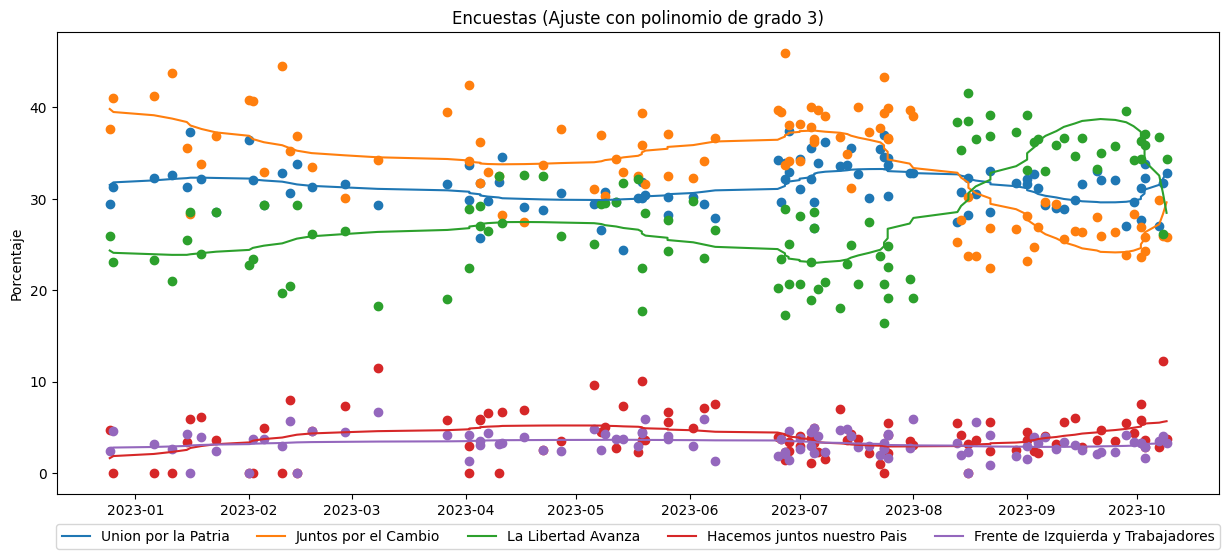

In [ ]:
degree = 5
surveys_poly_party = []
axis_x = np.arange(len(primera_vuelta_clean_grouped))
plt.figure(figsize=(15,6))

#maybe is better to add subplots
dates = primera_vuelta_clean_grouped['Inicio']
for party in parties_primera_vuelta:
    
    poly_reg_model = LinearRegression()
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(axis_x.reshape(-1, 1))
    
    y = primera_vuelta_clean_grouped[party].to_numpy()
    poly_reg_model.fit(poly_features, y)
    score = poly_reg_model.score(poly_features,y)
    print(score)
    #X_=np.linspace(axis_x.min(), axis_x.max(), 200).reshape(-1, 1)
    Y_=poly_reg_model.predict(poly_features)

    surveys_poly_party.append(Y_)
    
    plt.plot(dates, Y_,label=party)
    plt.scatter(dates,primera_vuelta_clean_grouped[party])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=5)
plt.title('Encuestas (Ajuste con polinomio de grado 3)')
plt.ylabel('Porcentaje')